In [4]:
!pip install skl2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 55.7 MB/s eta 0:00:00


In [10]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import joblib




In [11]:
# -------------------------------
# Step 1: Load dataset
# -------------------------------
data = pd.read_csv("cache_dataset_6000.csv")

# Step 2: Feature Engineering
data['hit_ratio'] = data['cache_hits'] / (data['cache_hits'] + data['cache_misses'])
data['miss_ratio'] = 1 - data['hit_ratio']

# Independent (X) and Dependent (y) variables
X = data[['hit_ratio', 'miss_ratio', 'cache_size', 'data_change_rate']]
y = data['TTL']



In [12]:
# Step 3: Split into train/test (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [13]:
# Step 4: Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [14]:
# Step 5: Evaluate model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")



Model Evaluation:
Mean Squared Error (MSE): 2282.0301
Root Mean Squared Error (RMSE): 47.7706
R² Score: 0.9929


In [15]:
# Step 6: Display coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:")
print(coefficients)




Model Coefficients:
                  Coefficient
hit_ratio         1501.178899
miss_ratio       -1501.178899
cache_size           0.297697
data_change_rate  -399.212876


In [ ]:
# -------------------------------
# Step 7: Convert to ONNX format
# -------------------------------
initial_type = [('float_input', FloatTensorType([None, 4]))]
onnx_model = convert_sklearn(model, initial_types=initial_type)

onnx_path = "linear_regression_ttl.onnx"
with open(onnx_path, "wb") as f:
    f.write(onnx_model.SerializeToString())

print(f"\n✅ Model successfully converted and saved as: {onnx_path}")

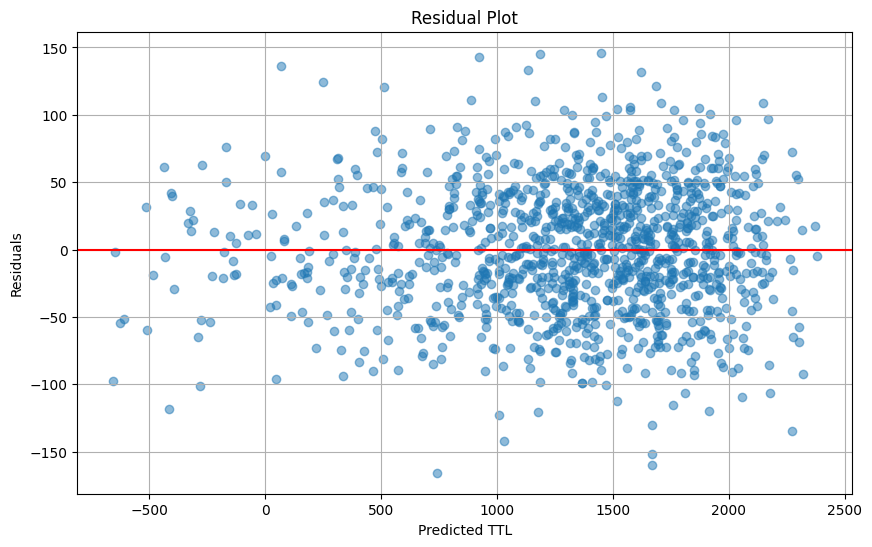

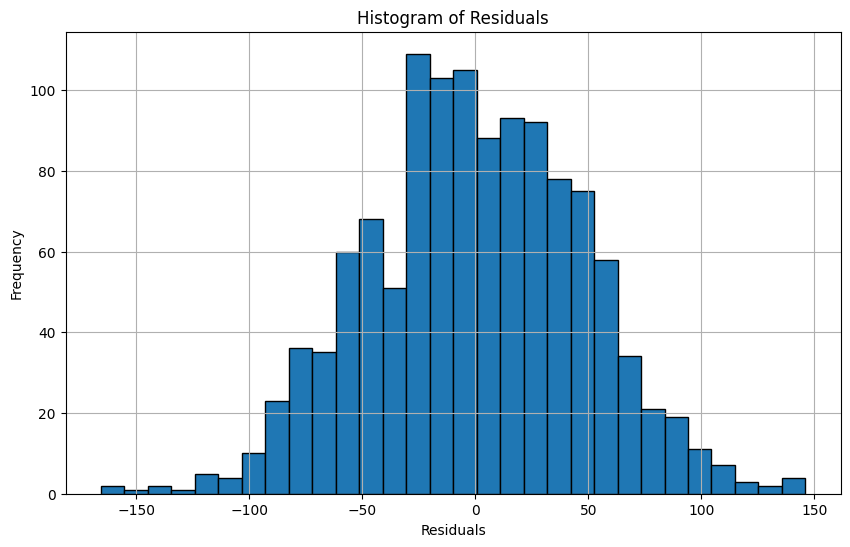

In [17]:
# Additional plots for model analysis

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.xlabel("Predicted TTL")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='-')
plt.grid(True)
plt.show()

# Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.grid(True)
plt.show()

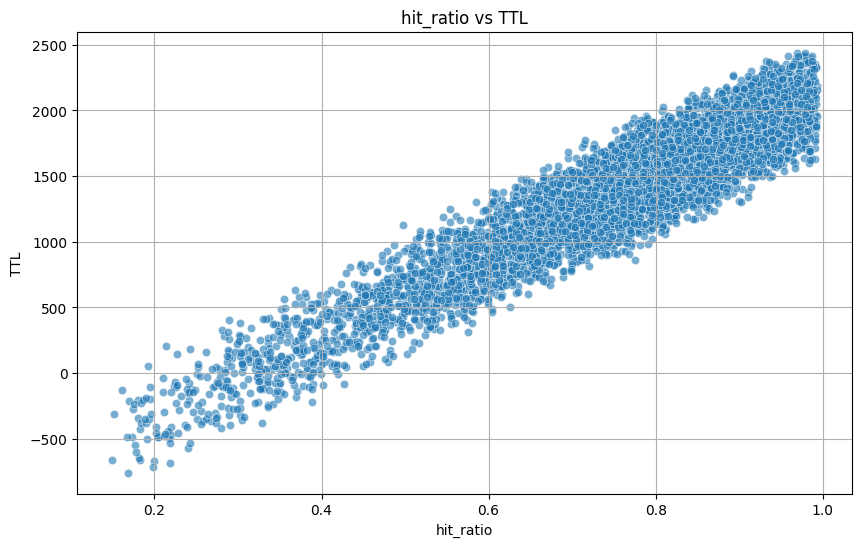

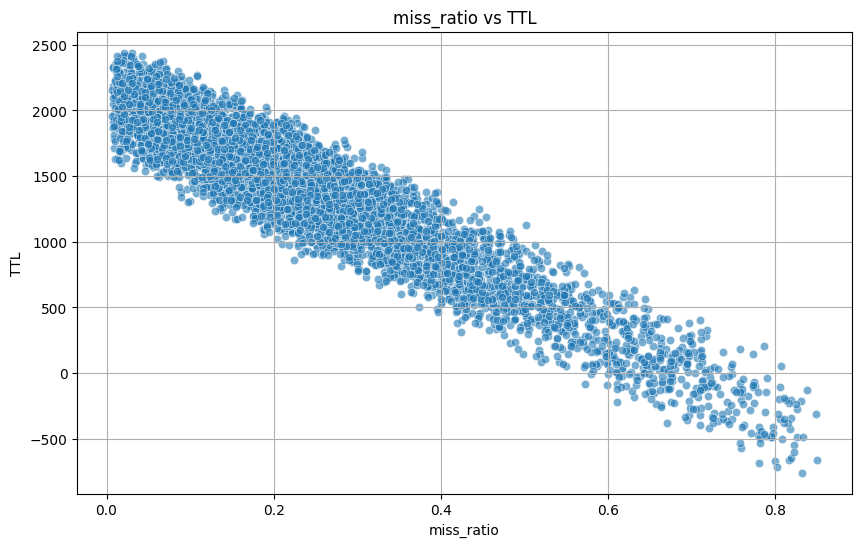

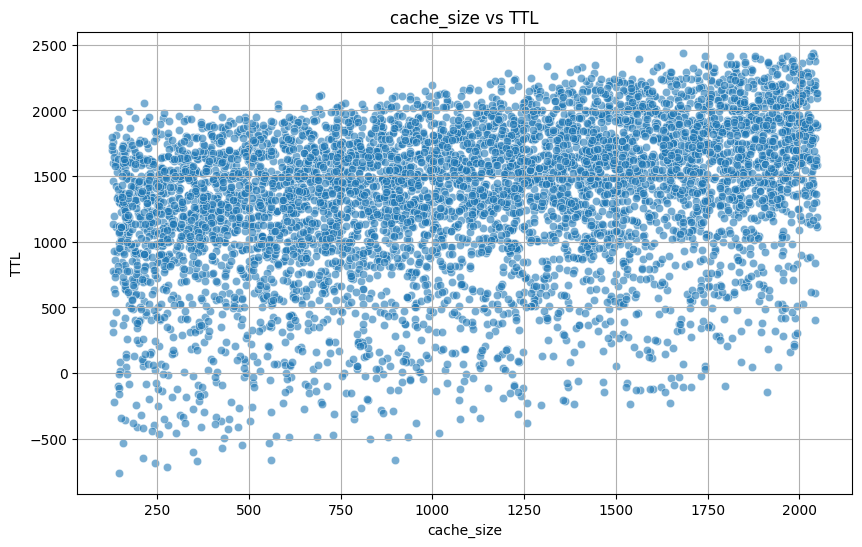

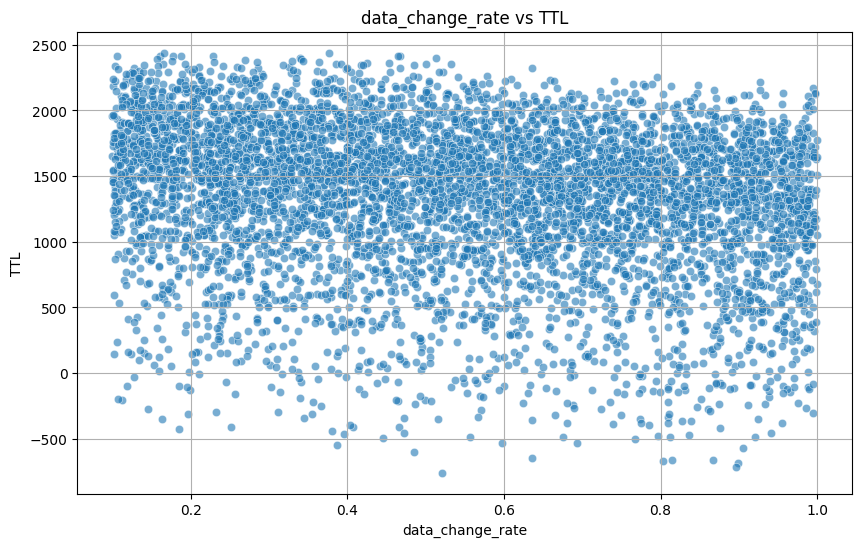

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['hit_ratio', 'miss_ratio', 'cache_size', 'data_change_rate']
target = 'TTL'

for feature in features:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data[feature], y=data[target], alpha=0.6)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.grid(True)
    plt.show()